#  Combinar `DataFrame`s usando `merge`

Muy a menudo, tenemos distintos `DataFrame`s que contienen información de distintas fuentes y queremos combinarlos en un único `DataFrame`.

In [1]:
# Preliminares
import pandas as pd
import numpy as np

Consideramos los dos `DataFrame`s:

In [2]:
clientes= pd.DataFrame(
    {'dni': ['12345678', '23456789', '34567890', '01234567'],
     'nombre': ['José', 'Pedro', 'María', 'Blanca'],
     'apellido1': ['Pérez', 'Martínez', 'Sánchez', 'Ruiz'],
     'apellido2': ['Martínez', 'Moreno', 'Meseguer', 'Torres']
    }
)
clientes

,dni,nombre,apellido1,apellido2
0,12345678,José,Pérez,Martínez
1,23456789,Pedro,Martínez,Moreno
2,34567890,María,Sánchez,Meseguer
3,01234567,Blanca,Ruiz,Torres


In [3]:
pedidos= pd.DataFrame(
    {'id': [10, 12, 21, 22, 24, 25, 28], 
     'dni': np.repeat(['23456789','12345678', '34567890', '87654321'], repeats=[2, 3, 1, 1]),
     'id_producto': ['AAA123', 'SOX433', 'QWE000', 'SOX433', 'PII342', 'ZXY099','PII342']})
pedidos

,id,dni,id_producto
0,10,23456789,AAA123
1,12,23456789,SOX433
2,21,12345678,QWE000
3,22,12345678,SOX433
4,24,12345678,PII342
5,25,34567890,ZXY099
6,28,87654321,PII342


Queremos construir una única tabla, `DataFrame` que contenga para cada cliente los distintos pedidos que ha realizado.

In [4]:
clientes.merge(pedidos)

,dni,nombre,apellido1,apellido2,id,id_producto
0,12345678,José,Pérez,Martínez,21,QWE000
1,12345678,José,Pérez,Martínez,22,SOX433
2,12345678,José,Pérez,Martínez,24,PII342
3,23456789,Pedro,Martínez,Moreno,10,AAA123
4,23456789,Pedro,Martínez,Moreno,12,SOX433
5,34567890,María,Sánchez,Meseguer,25,ZXY099


> `merge` ha utilizado las columnas comunes para realizar la combinación. En este caso ha usado  los valores de 'dni' para casar filas de ambos `DataFrame`s.

# Por defecto, `merge` sólo preserva las filas que aparecen en ambas tablas. 

Si un DNI que sí aparece en el `DataFrame` de la izquierda no aparece en el `DataFrame` de la derecha, está incluido del resultado, y viceversa. 

> Este comportamiento se controla con el argumento `how` que, por defecto, toma el valor 'inner'.

El argumento `how` puede tomar el valor 'left'. 

En este caso, todos los DNI que aparecen en el `DataFrame` de la izquierda, están incluidos en el resultado, aunque no aparezca en el `DataFrame` de la dereche, completando, en caso necesario, con `NaN`.

In [5]:
clientes.merge(pedidos, how='left')

,dni,nombre,apellido1,apellido2,id,id_producto
0,12345678,José,Pérez,Martínez,21.0,QWE000
1,12345678,José,Pérez,Martínez,22.0,SOX433
2,12345678,José,Pérez,Martínez,24.0,PII342
3,23456789,Pedro,Martínez,Moreno,10.0,AAA123
4,23456789,Pedro,Martínez,Moreno,12.0,SOX433
5,34567890,María,Sánchez,Meseguer,25.0,ZXY099
6,01234567,Blanca,Ruiz,Torres,NaN,NaN


> En cambio, si `how='left'`, si un DNI aparece en el `DataFrame` de la derecha pero no en el de la izquierda, está descartado del resultado. 

# Otro valor posible de `how`: 'right'

> En este caso, todos los DNI que aparecen en el `DataFrame` de la derecha, están incluidos en el resultado, aunque no aparezca en el `DataFrame` de la izquierda, completando, en caso necesario, con `NaN`.


In [6]:
clientes.merge(pedidos, how='right')

,dni,nombre,apellido1,apellido2,id,id_producto
0,23456789,Pedro,Martínez,Moreno,10,AAA123
1,23456789,Pedro,Martínez,Moreno,12,SOX433
2,12345678,José,Pérez,Martínez,21,QWE000
3,12345678,José,Pérez,Martínez,22,SOX433
4,12345678,José,Pérez,Martínez,24,PII342
5,34567890,María,Sánchez,Meseguer,25,ZXY099
6,87654321,NaN,NaN,NaN,28,PII342


> El dni 87654321 está en el `DataFrame` de la derecha pero no en el de la izquierda.

# Resumen visual: combinar `DataFrame`s con `merge`

> Los dos `DataFrame`s: las columnas con colores representan las claves sobre las que se van a hacer el `merge`. 

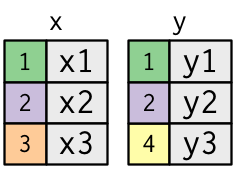

In [7]:
from IPython import display 
display.Image('https://multimediarepository.blob.core.windows.net/imagecontainer/f804d43f61f3489f80dffc075160f3c1.png')

> Imagen extraida de "R for Data Science", G. Grolemund & H. Wickham, capítulo 13, [https://r4ds.had.co.nz/](https://r4ds.had.co.nz/). Las cuatro imágenes que siguen están extraidas de esa misma fuente.

Para casar filas: 

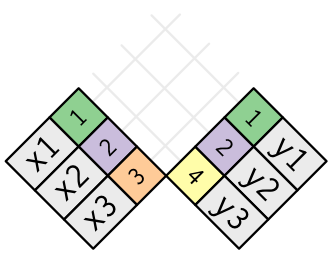

In [8]:
from IPython import display 
display.Image('https://multimediarepository.blob.core.windows.net/imagecontainer/c1cc4bc4fd4e438d9664e49ddaca0c5f.png')

> Imagen extraida de "R for Data Science", G. Grolemund & H. Wickham, capítulo 13, [https://r4ds.had.co.nz/](https://r4ds.had.co.nz/)

# `how='inner'`

Sólo se preservan las claves que están tanto en el `DataFrame` de la izquierda como en el `DataFrame` de la derecha.


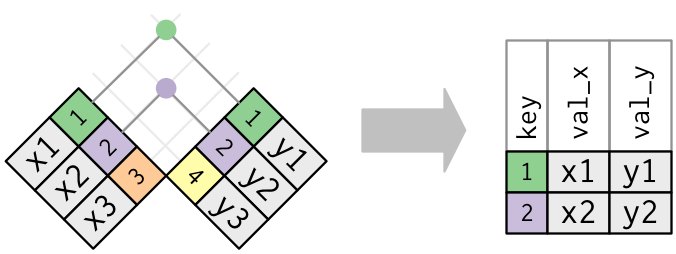

In [9]:
from IPython import display 
display.Image('https://multimediarepository.blob.core.windows.net/imagecontainer/73e3c9c2e89d425ca59112c6713abc15.png')

> Imagen extraida de "R for Data Science", G. Grolemund & H. Wickham, capítulo 13, [https://r4ds.had.co.nz/](https://r4ds.had.co.nz/)

# `how='left'`

- Se preservan todas las claves que están en el `DataFrame` de la izquierda, completando las claves del `DataFrame` de la derecha si es necesario.
- Se descartan las claves del `DataFrame` de la derecha que no están en el `DataFrame` de la izquierda.



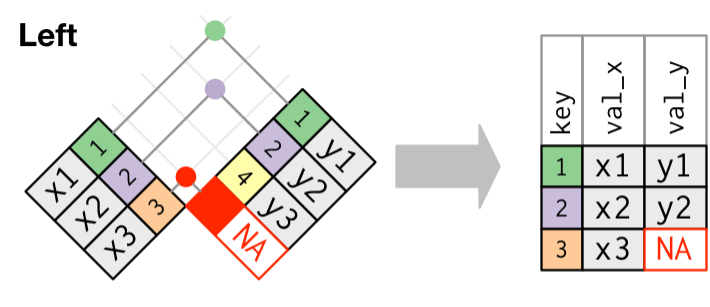

In [10]:
from IPython import display 
display.Image('https://multimediarepository.blob.core.windows.net/imagecontainer/632b4b8538144617adce7becaad1be0a.png')

> Imagen extraida de "R for Data Science", G. Grolemund & H. Wickham, capítulo 13, [https://r4ds.had.co.nz/](https://r4ds.had.co.nz/)

# `how='right'`

- Se preservan todas las claves que están en el `DataFrame` de la derecha, completando las claves del `DataFrame` de la izquierda si es necesario.
- Se descartan las claves del `DataFrame` de la izquierda que no están en el `DataFrame` de la derecha.



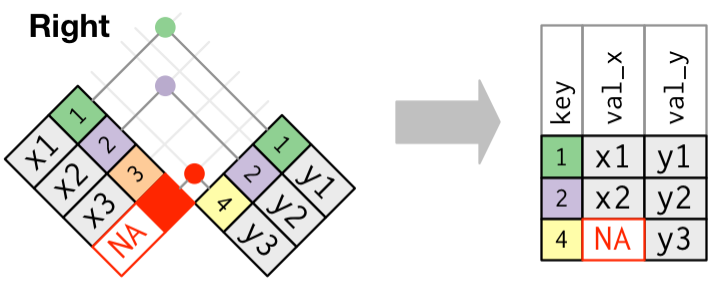

In [11]:
from IPython import display 
display.Image('https://multimediarepository.blob.core.windows.net/imagecontainer/d3a6a574488743799e6bf8c9c0873b62.png')

> Imagen extraida de "R for Data Science", G. Grolemund & H. Wickham, capítulo 13, [https://r4ds.had.co.nz/](https://r4ds.had.co.nz/)

# `how='outer'`

- Se preservan todas las claves que están en el `DataFrame` de la izquierda y todas las claves del `DataFrame` de la derecha, completando con `NaN` si es necesario.


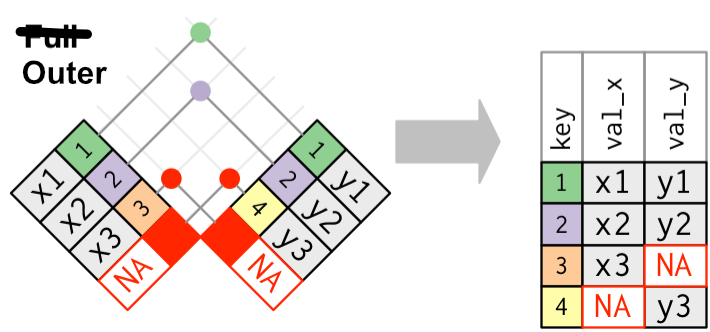

In [12]:
from IPython import display 
display.Image('https://multimediarepository.blob.core.windows.net/imagecontainer/a923e4b158f3455182372a35e98c8f9c.png')

> Imagen extraida de "R for Data Science", G. Grolemund & H. Wickham, capítulo 13, [https://r4ds.had.co.nz/](https://r4ds.had.co.nz/)

# NOTA: para todas las modalidades de `merge`, `inner`, `left`, `right` y `outer`

> Se hace un producto cartesiano: si un valor de la clave se repite en un `DataFrame`, se incluyen combinaciones de las filas.

Es lo que observamos con `clientes` y `pedidos`, el DNI 123456798 se repite tres veces en el `DataFrame` de pedidos, por lo tanto se combinan tres veces los datos del cliente 12345678 con sus pedidos.

In [13]:
clientes.merge(pedidos)

,dni,nombre,apellido1,apellido2,id,id_producto
0,12345678,José,Pérez,Martínez,21,QWE000
1,12345678,José,Pérez,Martínez,22,SOX433
2,12345678,José,Pérez,Martínez,24,PII342
3,23456789,Pedro,Martínez,Moreno,10,AAA123
4,23456789,Pedro,Martínez,Moreno,12,SOX433
5,34567890,María,Sánchez,Meseguer,25,ZXY099
